 **Behavioural Phenotyping for Down Syndrome Treatment on Mice** |Intro. to ML| Prof. Amit Sethi, IIT Bombay            	[Jan’22-May’22]                     

•	Performed Exploratory Data Analysis (EDA) and eliminated correlated variables and imputed missing variables.

•	Trained and validated hyperparameters of elastic-net logistic regression, Neural Net, SVM, and random forests for a Multiclass classification problem. Also checked feature importance, and eliminated variables to improve model performance.


In [ ]:
# Intro to ML, Assignment 2
# Developed by: Parth Brahmbhatt(213020067) and Jaymeen Chovatiya(213020003)



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

**Part 1: Read the data**

In [ ]:
csv_url_train="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv "
train_df = pd.read_csv(csv_url_train)

train_df= train_df.sample(frac =1 )

**Part 2: Perform exploratory data analysis to find out:**
**a. Which variables are usable, and which are not?**
**b. Are there significant correlations among variables?**
**c. Are the classes balanced?**

In [ ]:
print(train_df.shape)

(762, 79)


Dataset have 762 rows and 79 coulumns

In [ ]:
#checking the unique values
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print(col + " is of type " + str(train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(train_df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])
  

DYRK1A_N is of type float64 has 762 unique values, and 0 null entries
ITSN1_N is of type float64 has 761 unique values, and 0 null entries
BDNF_N is of type float64 has 762 unique values, and 0 null entries
NR1_N is of type float64 has 762 unique values, and 0 null entries
NR2A_N is of type float64 has 762 unique values, and 0 null entries
pAKT_N is of type float64 has 762 unique values, and 0 null entries
pBRAF_N is of type float64 has 760 unique values, and 0 null entries
pCAMKII_N is of type float64 has 762 unique values, and 0 null entries
pCREB_N is of type float64 has 762 unique values, and 0 null entries
pELK_N is of type float64 has 762 unique values, and 0 null entries
pERK_N is of type float64 has 762 unique values, and 0 null entries
pJNK_N is of type float64 has 761 unique values, and 0 null entries
PKCA_N is of type float64 has 762 unique values, and 0 null entries
pMEK_N is of type float64 has 762 unique values, and 0 null entries
pNR1_N is of type float64 has 762 unique 

All numeric fratures have float64 datatype

columns with null entries:ELK_N,Bcatenin_N,MEK_N,pCFOS_N,H3AcK18_N, EGR1_N, H3MeK4_N, BCL2_N, BAD_N 

we have 2 target coulmns. Genotype is binary calssification column : Control and Ts65Dn

Treatment_Behavior have 4 catagories for classification 

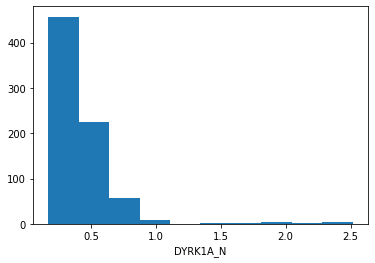

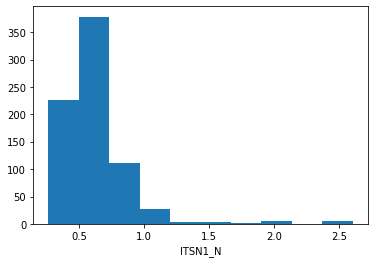

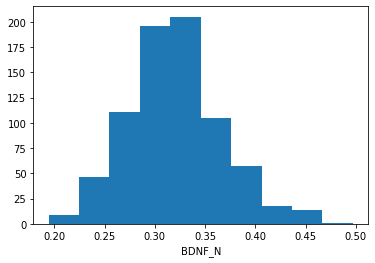

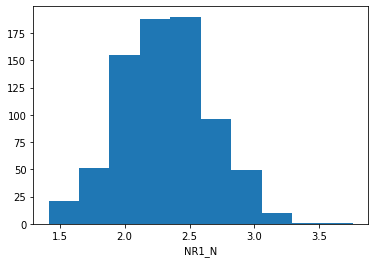

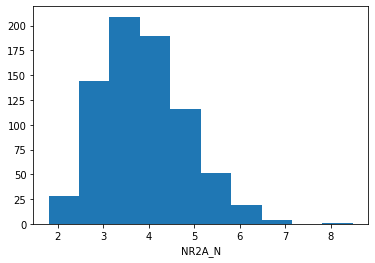

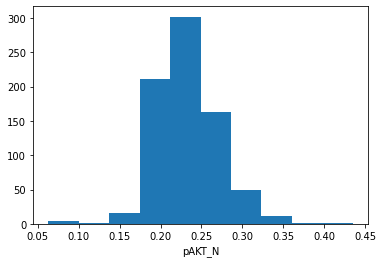

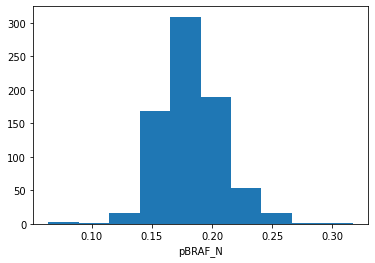

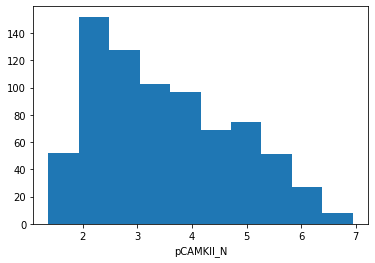

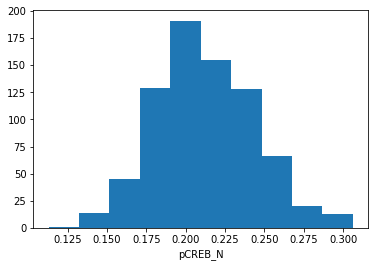

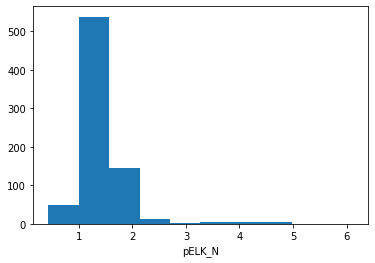

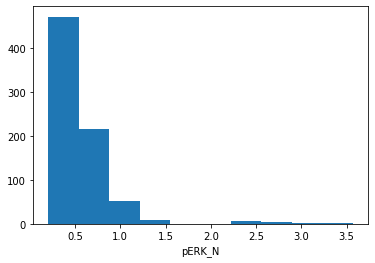

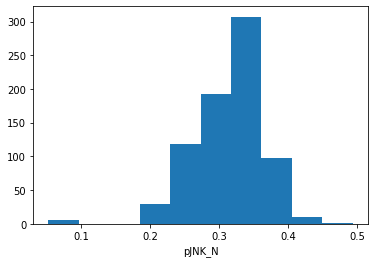

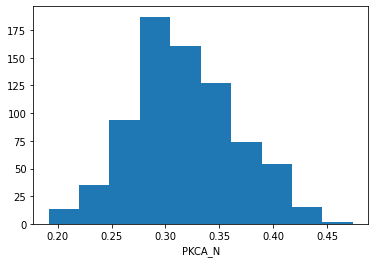

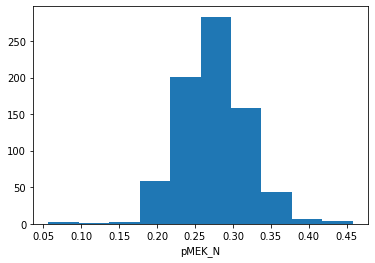

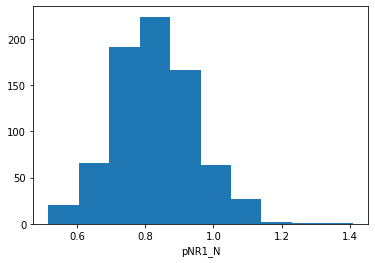

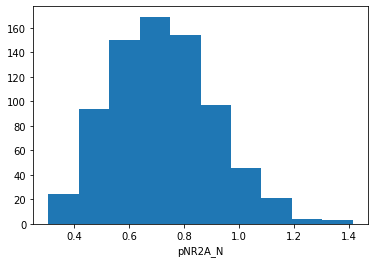

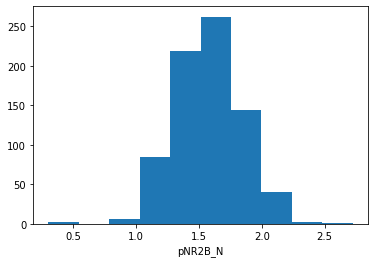

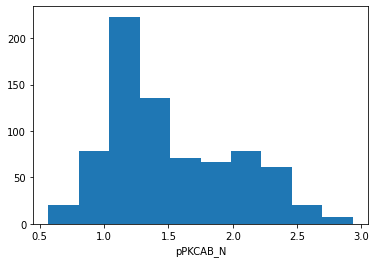

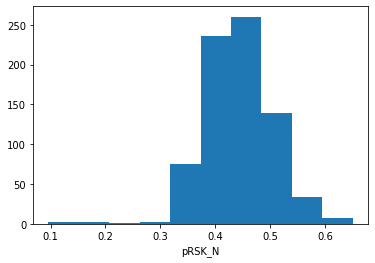

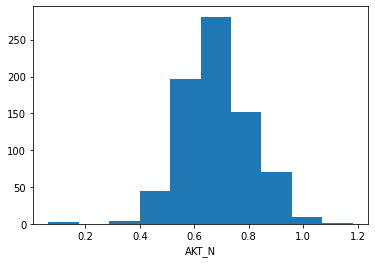

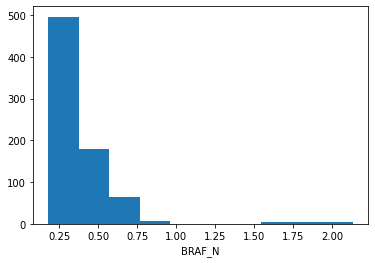

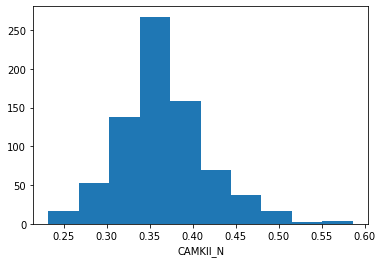

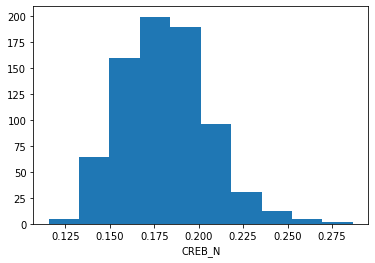

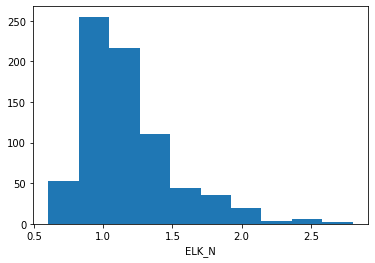

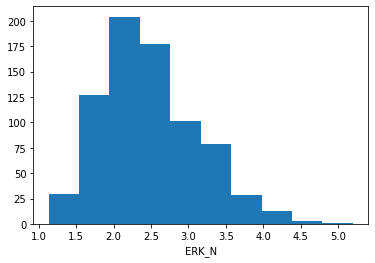

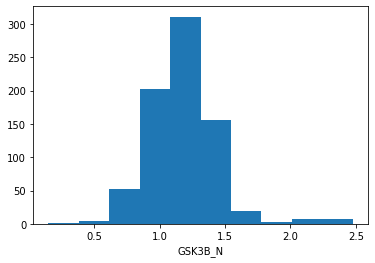

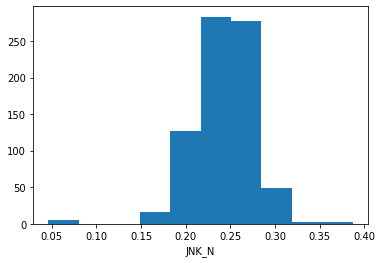

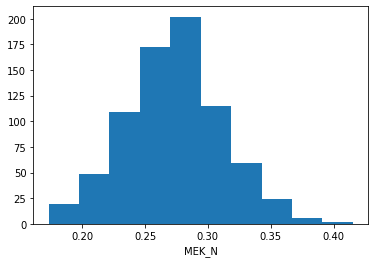

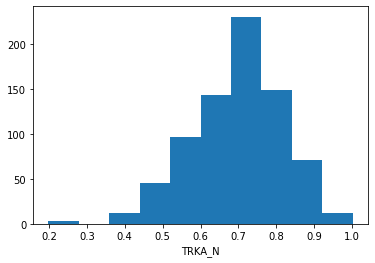

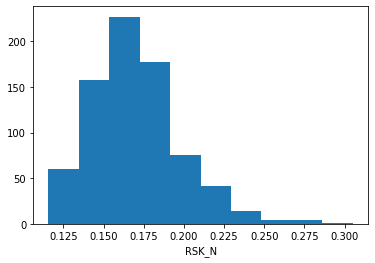

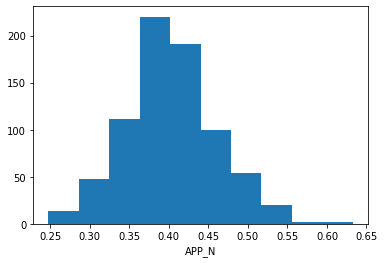

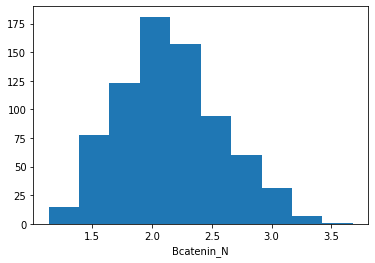

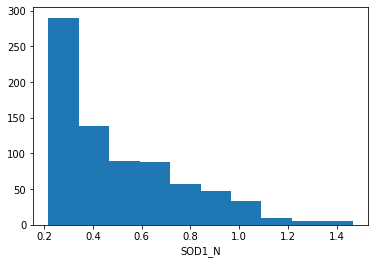

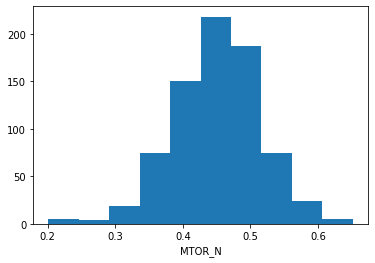

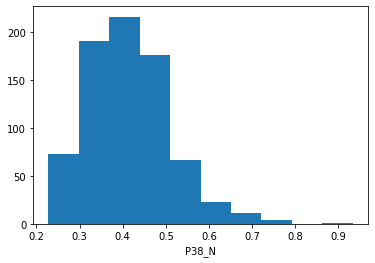

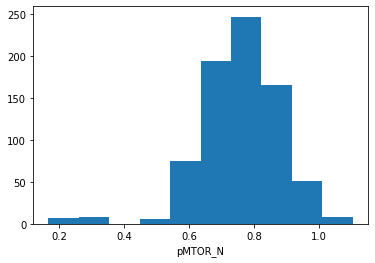

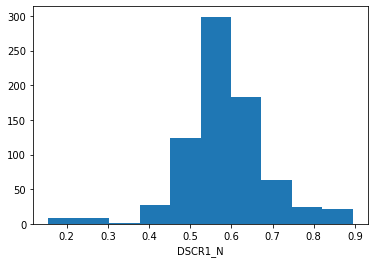

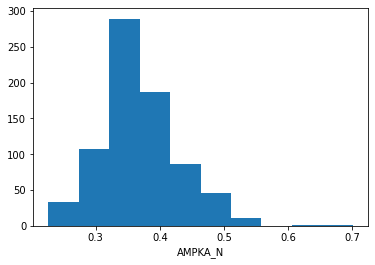

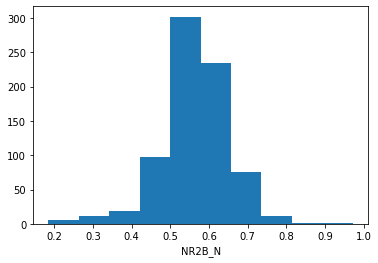

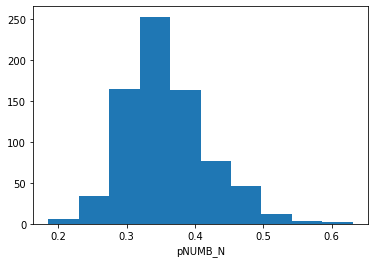

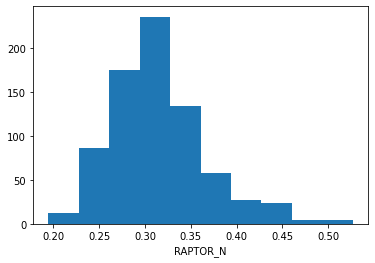

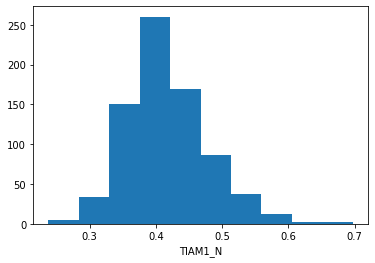

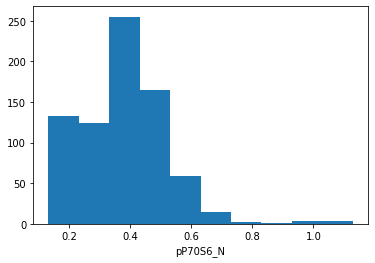

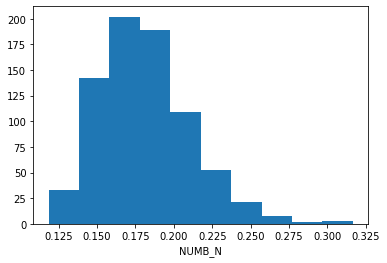

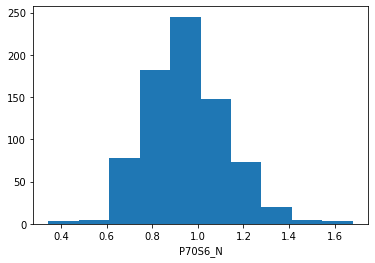

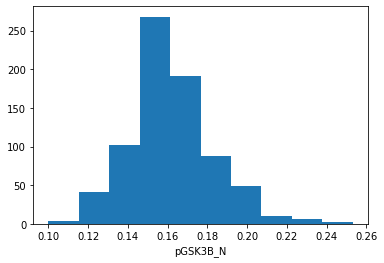

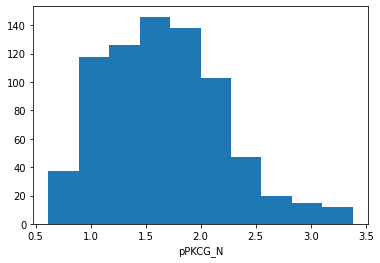

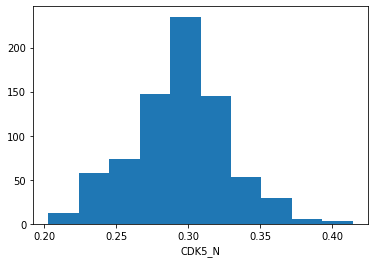

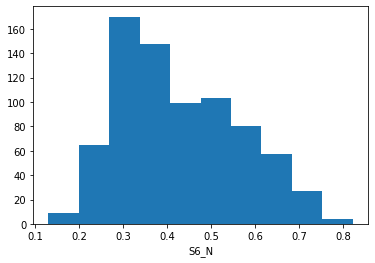

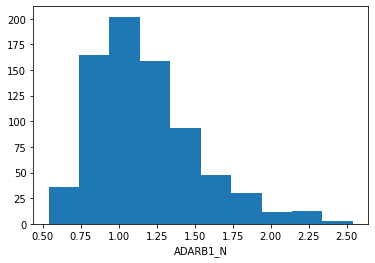

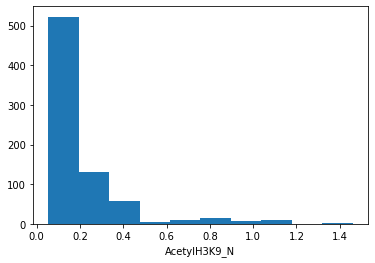

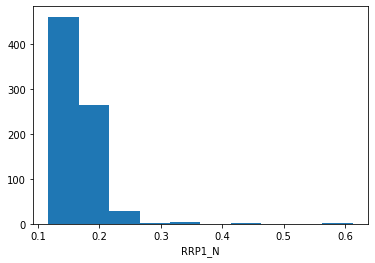

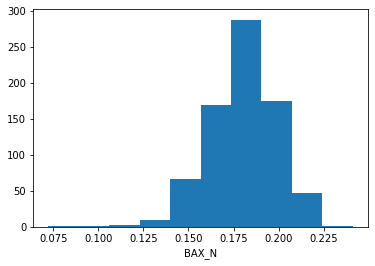

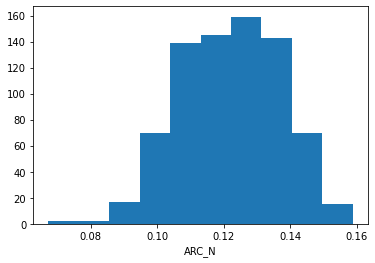

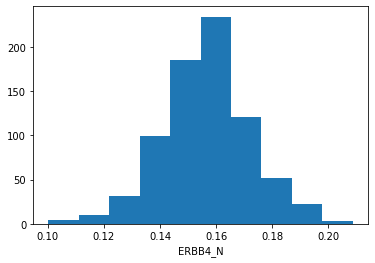

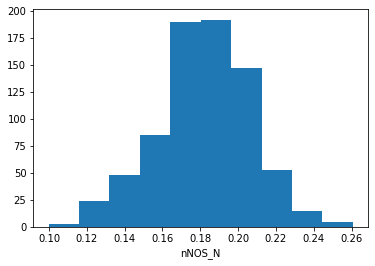

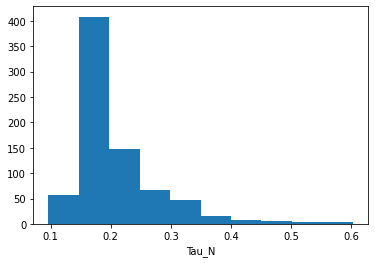

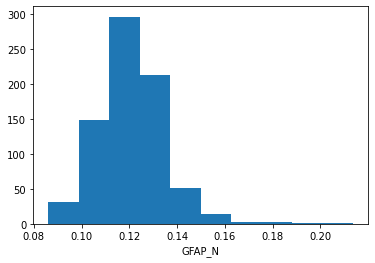

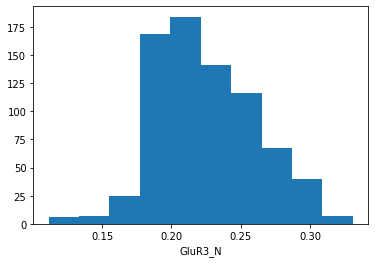

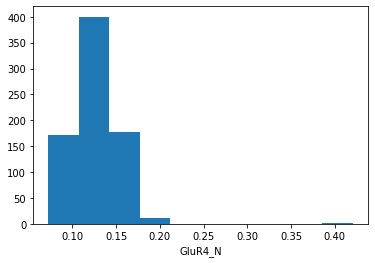

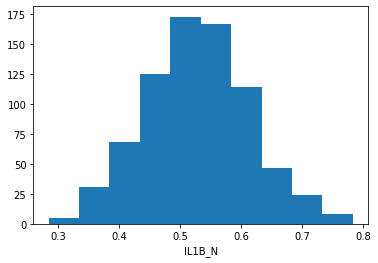

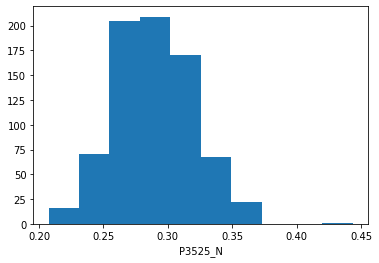

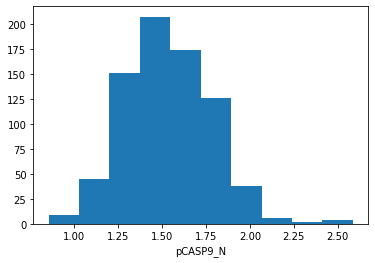

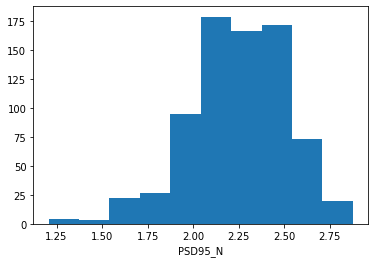

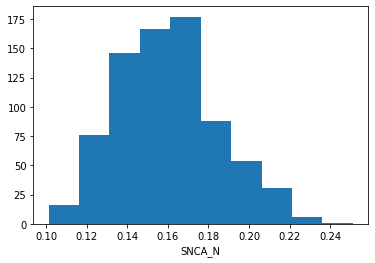

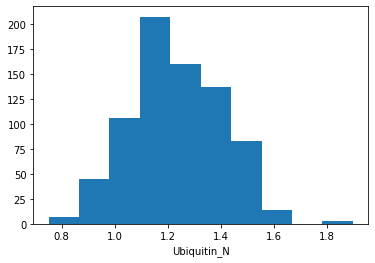

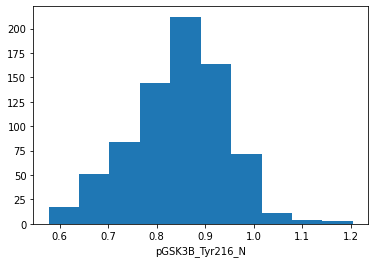

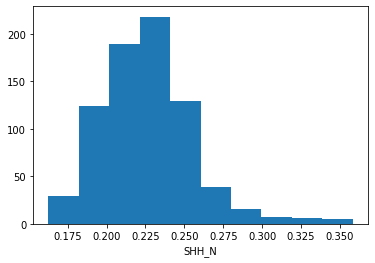

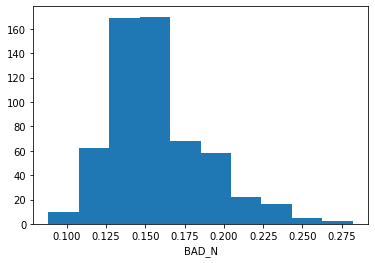

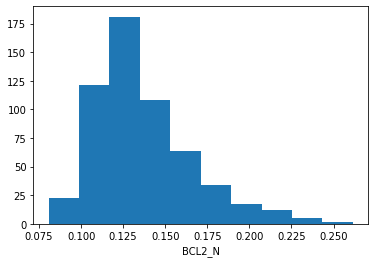

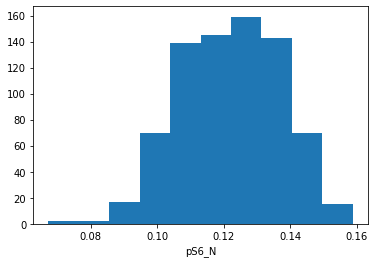

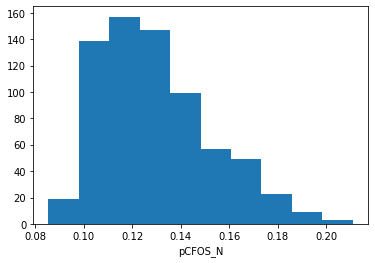

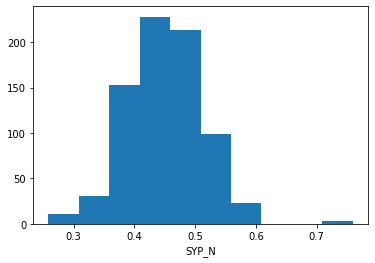

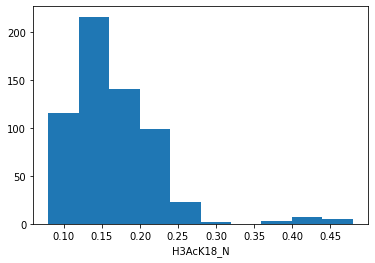

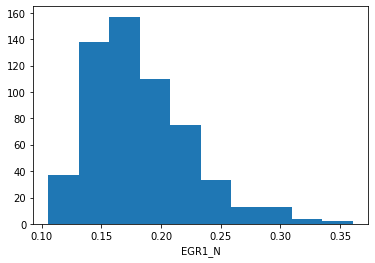

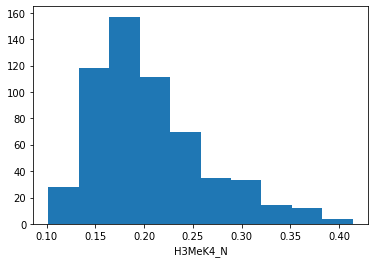

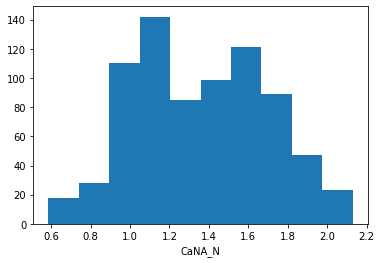

In [ ]:
#checking about balanced class or not
for col in train_df.columns.values:
 
   if (train_df[col].dtypes == 'float64'):            # plot of histogran 
     plt.hist(train_df[col])                         
     plt.xlabel(col)                                 
     plt.show()

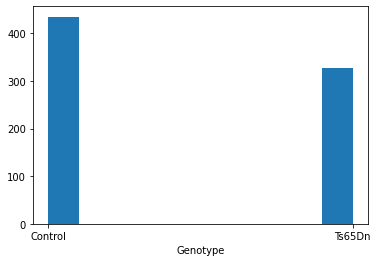

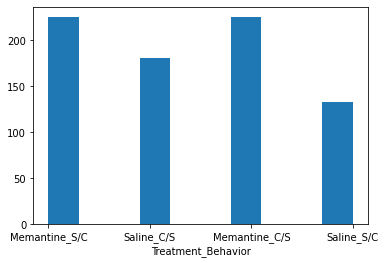

In [ ]:
#checking about balanced class or not
for col in train_df.columns.values:
 
   if (train_df[col].dtypes == 'object'):            # plot of histogran 
     plt.hist(train_df[col])                        
     plt.xlabel(col)                                 
     plt.show()

All Classes are nearly balanced

In [ ]:
#create a copy of train_df to do all the transformations
train_copy = train_df.copy()

In [ ]:
# collection of numeric type features into num_df dataframe
num_df = train_df.select_dtypes(include=['int64','float64']).copy()
num_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
719,0.713426,0.805308,0.265834,1.860393,2.822034,0.205843,0.160348,1.875558,0.194469,1.760928,...,0.227592,0.141569,NaN,0.104418,0.107304,0.390261,0.141208,0.174031,0.236429,1.524797
564,0.250610,0.409818,0.317874,1.968538,2.791429,0.225658,0.205858,2.090860,0.179550,1.392189,...,0.244999,NaN,NaN,0.146224,0.153512,0.375717,NaN,NaN,0.371375,0.765855
443,0.646086,0.942658,0.313107,2.259709,3.694630,0.217536,0.170813,2.274727,0.211013,1.636984,...,0.192907,0.118344,NaN,0.099226,NaN,0.347290,0.106586,0.110410,0.136889,1.739987
45,0.377846,0.555621,0.315109,2.220944,4.887097,0.194853,0.158325,3.391129,0.179554,1.247865,...,0.239625,NaN,0.130371,0.138143,0.127805,0.505059,NaN,NaN,NaN,1.817862
756,0.420346,0.666251,0.344047,2.308472,3.622406,0.246060,0.195350,3.469496,0.233578,1.408800,...,0.197714,0.151736,0.113463,0.115919,0.115919,0.427519,0.144793,0.153599,0.168417,1.481033


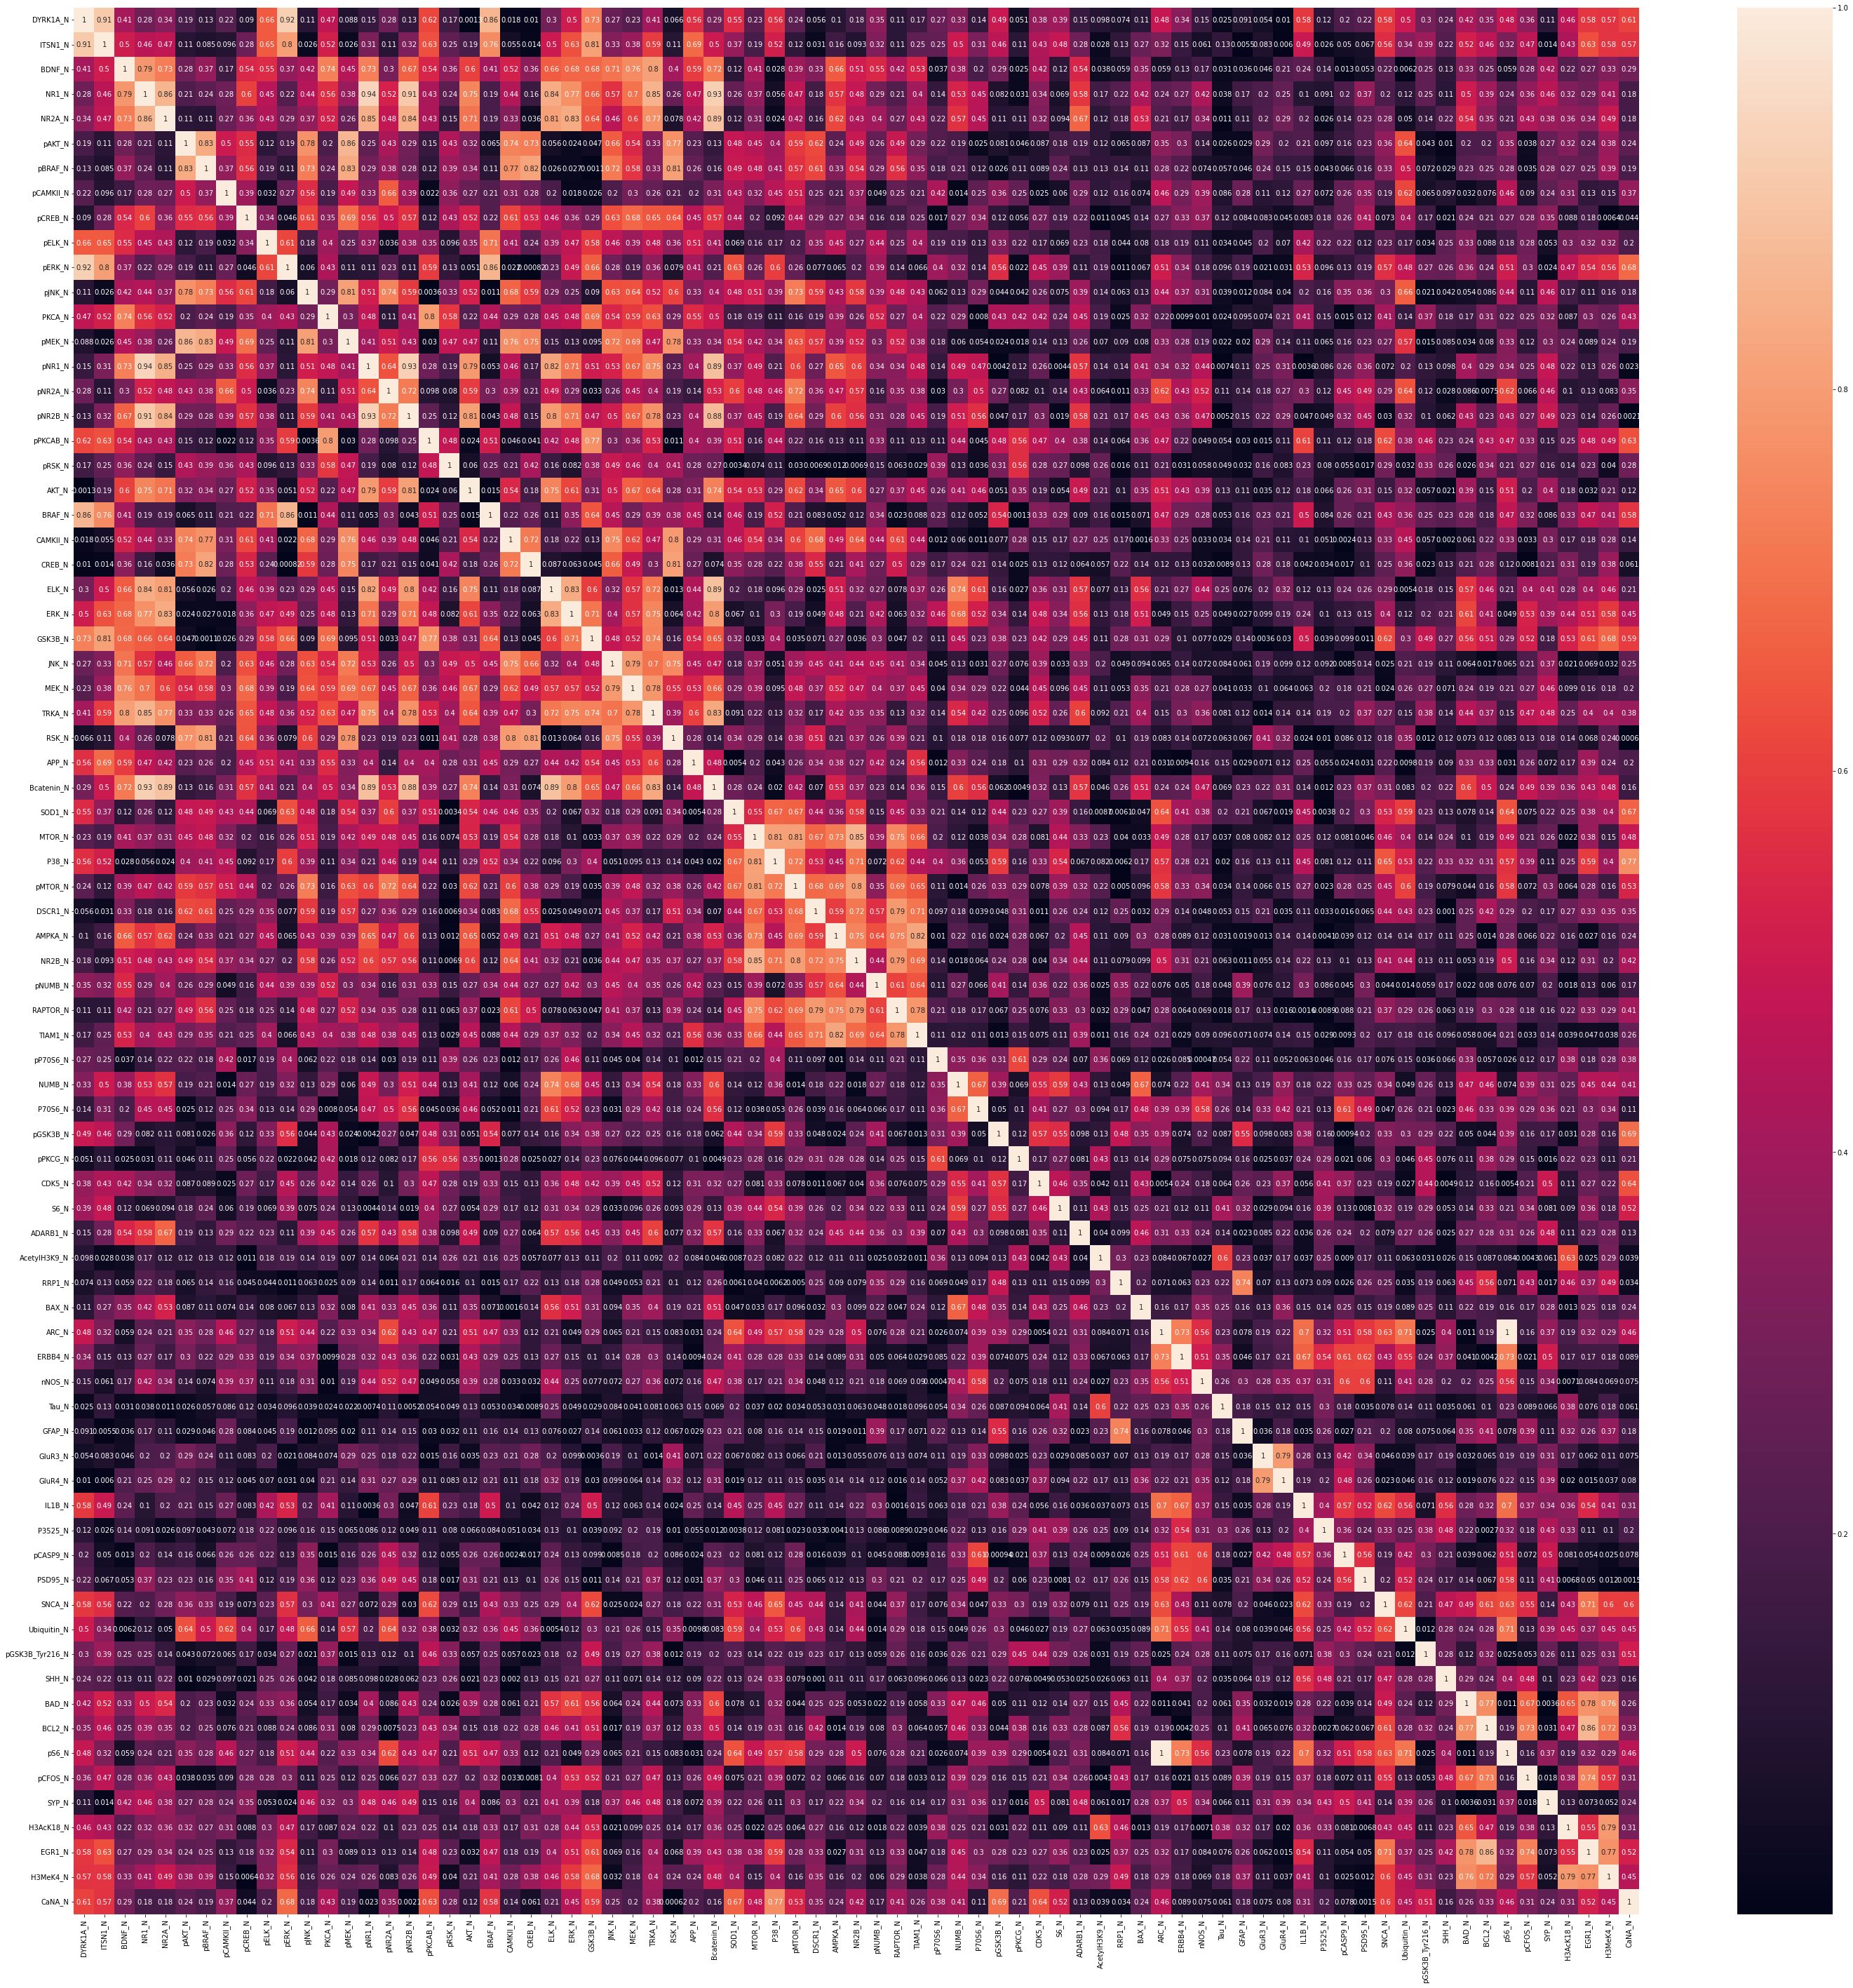

In [ ]:
corrMatrix = num_df.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

In [ ]:
upper_tri = corrMatrix.where(np.triu(np.ones(corrMatrix.shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
#Droping the column with high correlation

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]
print(); print(to_drop)



['ITSN1_N', 'NR2A_N', 'pBRAF_N', 'pERK_N', 'pMEK_N', 'pNR1_N', 'pNR2B_N', 'AKT_N', 'BRAF_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'TRKA_N', 'RSK_N', 'Bcatenin_N', 'P38_N', 'pMTOR_N', 'NR2B_N', 'TIAM1_N', 'pS6_N', 'EGR1_N']


In [ ]:
#Now we are droping the columns which are in the list 'to_drop' from the dataframe
train_copy1 = train_copy.drop(to_drop, axis=1)
print(train_copy1.shape)

(762, 57)


Ref :  https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

**Part 3: Develop a strategy to deal with missing variables. You can choose to** **impute the variable. The recommended** 
**way is to use multivariate feature imputation**

In [ ]:
Columns =[column for column in train_copy1.columns]

Columns = Columns[0:-2]
print(Columns)

['DYRK1A_N', 'BDNF_N', 'NR1_N', 'pAKT_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pJNK_N', 'PKCA_N', 'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'CAMKII_N', 'JNK_N', 'MEK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'DSCR1_N', 'AMPKA_N', 'pNUMB_N', 'RAPTOR_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'H3MeK4_N', 'CaNA_N']


In [ ]:
# collection of numeric type features into num_df dataframe
num_df1 = train_copy1.select_dtypes(include=['int64','float64']).copy()

In [ ]:
 # multivariant impute for missing data


'''from sklearn.impute import SimpleImputer
imp_uni = SimpleImputer(strategy="mean")
num_df1 = (imp_uni.fit_transform(num_df1))                         # univariant impute for missing data
num_df1 = pd.DataFrame(num_df1)'''

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
num_df1 = (imp.fit_transform(num_df1))                         # multivariant impute for missing data
num_df1 = pd.DataFrame(num_df1)
IterativeImputer(random_state=0)


IterativeImputer(random_state=0)

In [ ]:
num_df1.columns =Columns

**Part 4: Select metrics that you will use, such as accuracy, F1 score, balanced** **accuracy, AUC etc. Remember, you** 
**have two separate classification tasks – one is binary, the other has four** **classes. You may have to do some **
**reading about multi-class classification metrics**.

In [ ]:
#for binary classifiation we are using here Area Under Curve(AUC) matric
#for four class (multiclass) we are using Accuracy matric


**Part:5 Using five-fold cross-validation find the reasonable (I cannot say** **“best” because you have two separate** 
**classifications to perform) hyper-parameter settings for the following model types:**
**a. Elastic net logistic regression (L1 and L2 weight)
b. Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight 
decay)
c. SVM (a few kernels, their hyper-parameters such as width, and slack penalty)
d. Random forest (number of trees, max tree depth, max number of variables per node)**

In [ ]:
#model trainig
X= num_df1;

#normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

y_c = train_copy1.iloc[:,-2]
y_m = train_copy1.iloc[:,-1]

y_c = y_c.replace({'Ts65Dn': -1, 'Control': 1 })
y_m = y_m.replace({'Memantine_C/S': 1, 'Memantine_S/C': 2 ,'Saline_C/S': 3, 'Saline_S/C': 4})
# splitting X and y into training and validation sets
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['linear','rbf']
        }  
    },
     'Neural_network': {
        'model': MLPClassifier(max_iter=5000),
        'params' : {
            'hidden_layer_sizes': [10,20,40],
            'learning_rate_init': [0.0005,0.0001,0.005,0.001,0.01,0.05,0.1]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth' : [1,10,20]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(penalty='elasticnet',solver='saga',max_iter=5000),
        'params': {
            'C': [1,5,10],
            'l1_ratio':np.linspace(0,1,num =11)
        }
    }
}

In [ ]:
#binary classification
scores_bi = []

for model_name, mp in model_params.items():
    clf_bi =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring='roc_auc')
    clf_bi.fit(X, y_c)
    scores_bi.append({
        'model': model_name,
        'best_score': clf_bi.best_score_,
        'best_params': clf_bi.best_params_
    })
    
df_bi = pd.DataFrame(scores_bi,columns=['model','best_score','best_params'])
df_bi

,model,best_score,best_params
0,svm,0.999682,"{'C': 10, 'kernel': 'rbf'}"
1,Neural_network,0.999151,"{'hidden_layer_sizes': 40, 'learning_rate_init..."
2,random_forest,0.997244,"{'max_depth': 20, 'n_estimators': 10}"
3,logistic_regression,0.985983,"{'C': 1, 'l1_ratio': 0.8}"


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#multiclass  classification
scores_multi = []

for model_name, mp in model_params.items():
    clf_multi =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    clf_multi.fit(X, y_m)
    scores_multi.append({
        'model': model_name,
        'best_score': clf_multi.best_score_,
        'best_params': clf_multi.best_params_
    })
    
df_multi = pd.DataFrame(scores_multi,columns=['model','best_score','best_params'])
df_multi

,model,best_score,best_params
0,svm,0.997386,"{'C': 10, 'kernel': 'rbf'}"
1,Neural_network,0.998693,"{'hidden_layer_sizes': 40, 'learning_rate_init..."
2,random_forest,0.975095,"{'max_depth': 20, 'n_estimators': 10}"
3,logistic_regression,0.988209,"{'C': 5, 'l1_ratio': 0.6000000000000001}"


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()[-10:][: :-1]
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

In [ ]:
X1=pd.DataFrame(X)
X1.columns =Columns

**Part 6: Check feature importance for each model to see if the same proteins are important for each model**

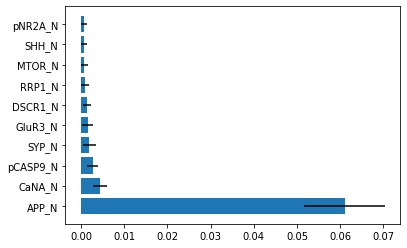

In [ ]:
#Binary Classifiaction

#SVM
perm_importance_result_train = permutation_importance(svm.SVC(gamma='auto',C =1,kernel = 'rbf').fit(X,y_c), X, y_c, n_repeats=10)

plot_feature_importances(perm_importance_result_train,X1.columns)

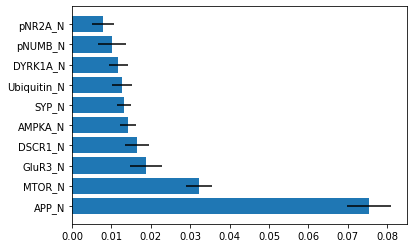

In [ ]:
#NN
perm_importance_result_train = permutation_importance(MLPClassifier(max_iter=5000,hidden_layer_sizes=10,learning_rate_init = 0.001).fit(X,y_c), X, y_c, n_repeats=10)

plot_feature_importances(perm_importance_result_train,X1.columns)

<BarContainer object of 10 artists>

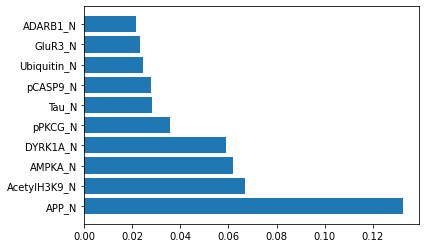

In [ ]:
# Random Forest feature importnace
df_imp = pd.DataFrame({'Feture_names':num_df1.columns,'Importance':RandomForestClassifier(n_estimators=10,max_depth=20).fit(X,y_c).feature_importances_})
df_imp1=df_imp.sort_values(by ='Importance',ascending=False).head(n=10)
plt.barh(df_imp1['Feture_names'],df_imp1['Importance'])

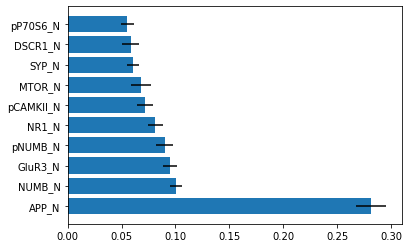

In [ ]:
#Logistic elasticnet
perm_importance_result_train = permutation_importance(LogisticRegression(penalty='elasticnet',solver='saga',max_iter=5000,C=10,l1_ratio=1).fit(X,y_c), X, y_c, n_repeats=10)

plot_feature_importances(perm_importance_result_train,X1.columns)

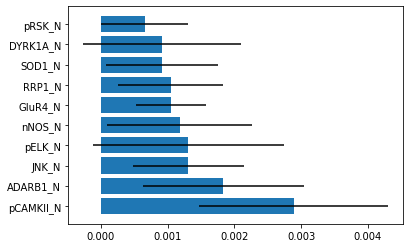

In [ ]:
#multiclass classifiactio

#SVM
perm_importance_result_train = permutation_importance(svm.SVC(gamma='auto',C =1,kernel = 'rbf').fit(X,y_m), X, y_m, n_repeats=10)

plot_feature_importances(perm_importance_result_train,X1.columns)

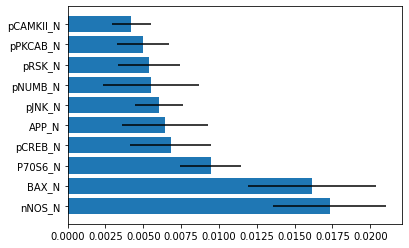

In [ ]:
#NN
perm_importance_result_train = permutation_importance(MLPClassifier(max_iter=5000,hidden_layer_sizes=40,learning_rate_init = 0.001).fit(X,y_m), X, y_m, n_repeats=10)

plot_feature_importances(perm_importance_result_train,X1.columns)

<BarContainer object of 10 artists>

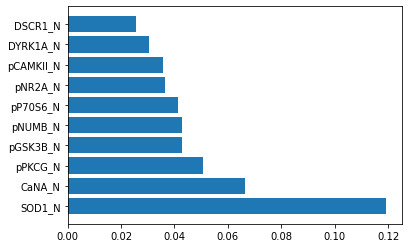

In [ ]:
# Random Forest feature importnace
df_imp = pd.DataFrame({'Feture_names':num_df1.columns,'Importance':RandomForestClassifier(n_estimators=10,max_depth=20).fit(X,y_m).feature_importances_})
df_imp1=df_imp.sort_values(by ='Importance',ascending=False).head(n=10)
plt.barh(df_imp1['Feture_names'],df_imp1['Importance'])

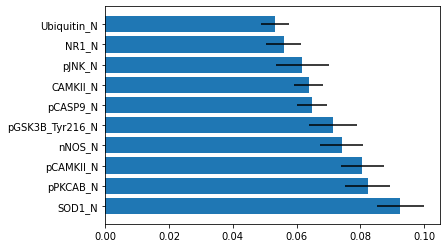

In [ ]:
#Logistic elasticnet
perm_importance_result_train = permutation_importance(LogisticRegression(penalty='elasticnet',solver='saga',max_iter=5000,C=10,l1_ratio=1).fit(X,y_m), X, y_m, n_repeats=10)

plot_feature_importances(perm_importance_result_train,X1.columns)

Reference:https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html#feature-importance-by-permutation

**Part 7:See if removing some features systematically will improve your models (e.g. using recursive feature 
elimination)**

**Recursive feture elimination**

In [ ]:
# Binary classification

X_rfe = pd.DataFrame(X)

from numpy.lib.function_base import select
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

def Recursive_feture_elimination(features, model):
    
    select = RFE(estimator=model,n_features_to_select=features)
    select.fit(X_rfe, y_c)
    X_train_selected = select.transform(X_rfe)

    print("X_rfe.shape: {}".format(X_rfe.shape))
    print("X_train_selected.shape: {}".format(X_train_selected.shape))

    X_train_selected = select.transform(X_rfe)

    model.fit(X_rfe,y_c)
    print("Scores with all features: {:,.3f}".format(model.score(X_rfe,y_c)))
                                                              
    model.fit(X_train_selected,y_c)  
    print("Scores with selected features: {:,.3f}".format(model.score(X_train_selected,y_c)))


    rfecv = RFECV(estimator=model, step=2, cv=5,scoring='roc_auc')
    rfecv.fit(X_rfe, y_c)

    print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# SVM
model = svm.SVC(kernel="linear",C=5)
features= 40

Recursive_feture_elimination(features, model)

X_rfe_m.shape: (762, 55)
X_train_selected.shape: (762, 40)
Scores with all features: 1.000
Scores with selected features: 1.000
Optimal number of features: 43


In [ ]:
# LogisticRegression

model = LogisticRegression(penalty='elasticnet',solver='saga',max_iter=5000,C=10,l1_ratio=1)
features= 20

Recursive_feture_elimination(features, model)

X_rfe.shape: (762, 55)
X_train_selected.shape: (762, 20)
Scores with all features: 0.974
Scores with selected features: 0.961
Optimal number of features: 27


In [ ]:
#RandomForestClassifier

model = RandomForestClassifier(n_estimators=10,max_depth=20)
features= 46

Recursive_feture_elimination(features, model)

X_rfe.shape: (762, 55)
X_train_selected.shape: (762, 46)
Scores with all features: 0.999
Scores with selected features: 1.000
Optimal number of features: 41


In [ ]:
from pandas.core.common import random_state
# Best model for Binary classification: Support vector machine
X_rfe = pd.DataFrame(X)
    
rfecv_bi = RFECV(estimator=svm.SVC(kernel="linear",C=10,random_state=0),min_features_to_select=40, step=0.1, cv=5)
rfecv_bi.fit(X_rfe, y_c)

print('Optimal number of features: {}'.format(rfecv_bi.n_features_))

X_rfe = pd.DataFrame(X_rfe)
selected_features_bi = rfecv_bi.get_support(1)
X_new_rfe_binary = X_rfe[X_rfe.columns[selected_features_bi]]
X_new_rfe_binary


Optimal number of features: 45


,0,2,3,4,5,6,7,8,10,11,...,44,45,46,48,49,50,51,52,53,54
0,1.002602,-1.317523,-0.680557,-1.291848,-0.567344,0.614794,-1.073142,-1.222836,-0.512374,-1.373498,...,-0.762889,-0.143213,-0.221876,-0.594146,0.276608,-0.951157,-0.963632,-0.418645,0.465561,0.495253
1,-0.680395,-1.001952,-0.178861,-1.121992,-1.047906,-0.107804,-0.162726,-0.480663,-0.993723,-0.829072,...,1.941731,1.060388,-1.272863,1.345692,1.891332,1.032975,-1.197228,3.970000,2.849776,-1.757564
2,0.757727,-0.152309,-0.384487,-0.976936,-0.034451,0.371909,-1.510328,0.057203,0.155486,-0.458351,...,-2.368170,-1.848477,0.202518,-1.338768,-1.494308,-2.039273,-1.653796,-0.833090,-1.293098,1.134014
3,-0.217710,-0.265425,-0.958817,-0.096189,-1.047767,-0.390627,0.093952,-0.716442,-0.713351,-1.829583,...,-0.429569,0.226322,-0.009418,-0.716667,-0.281604,-0.070876,0.880131,-0.563118,-0.596514,1.365176
4,-0.063161,-0.010015,0.337716,-0.034364,0.692358,-0.075252,1.043221,0.399681,0.225606,1.316678,...,-0.822971,-0.852052,0.996610,-0.268180,-0.820114,-0.581246,-0.365241,-0.375740,-0.736079,0.365345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.293948,0.250346,1.229111,-0.672477,0.450196,0.081933,0.562945,0.758691,-0.539854,-0.017367,...,-0.078356,-0.661789,-2.185939,0.853290,0.813392,0.649244,-1.811032,3.063266,2.265853,-1.927143
758,-0.707243,0.262735,0.042320,1.491685,-0.500168,-0.405198,0.055946,0.820120,0.878248,0.328005,...,-0.008015,0.361829,0.416768,-0.263344,-0.316391,-0.438267,1.089099,0.415295,-0.298178,-0.521653
759,1.544427,0.682474,-0.123127,1.619511,0.698563,0.468480,-0.202562,1.826853,2.468988,1.840807,...,-1.658320,-0.039168,1.162517,-0.536687,-1.061196,-0.578163,-0.309403,0.019226,-0.785444,0.682987
760,-0.084395,-0.319978,0.200523,1.148303,-0.780508,-0.058694,0.115677,-0.495168,-0.590930,-0.761896,...,0.323839,0.546439,0.497765,-1.045015,-0.534253,-0.156219,-0.406141,-0.615196,-0.998199,-1.238698


In [ ]:
# Multiple classification

X_rfe_m = pd.DataFrame(X)

from numpy.lib.function_base import select
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

def Recursive_feture_elimination(features, model):
    
    select = RFE(estimator=model,n_features_to_select=features)
    select.fit(X_rfe_m, y_m)
    X_train_selected = select.transform(X_rfe_m)

    print("X_rfe_m.shape: {}".format(X_rfe_m.shape))
    print("X_train_selected.shape: {}".format(X_train_selected.shape))

    X_train_selected = select.transform(X_rfe_m)

    model.fit(X_rfe_m,y_m)
    print("Scores with all features: {:,.3f}".format(model.score(X_rfe_m,y_m)))
                                                              
    model.fit(X_train_selected,y_m)  
    print("Scores with selected features: {:,.3f}".format(model.score(X_train_selected,y_m)))

    
    rfecv = RFECV(estimator=model, step=2, cv=5,scoring='accuracy')
    rfecv.fit(X_rfe_m, y_m)

    print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# SVM
model = svm.SVC(kernel="linear",C=5)
features= 40

Recursive_feture_elimination(features, model)

X_rfe_m.shape: (762, 55)
X_train_selected.shape: (762, 40)
Scores with all features: 1.000
Scores with selected features: 1.000
Optimal number of features: 43


In [ ]:
# LogisticRegression

model = LogisticRegression(penalty='elasticnet',solver='saga',max_iter=5000,C=10,l1_ratio=1)
features= 20

Recursive_feture_elimination(features, model)

X_rfe_m.shape: (762, 55)
X_train_selected.shape: (762, 20)
Scores with all features: 1.000
Scores with selected features: 0.988
Optimal number of features: 39


In [ ]:
#RandomForestClassifier

model = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=1)
features= 46

Recursive_feture_elimination(features, model)

X_rfe_m.shape: (762, 55)
X_train_selected.shape: (762, 46)
Scores with all features: 0.997
Scores with selected features: 0.999
Optimal number of features: 37


In [ ]:
# Best model for Multiple classification: Support Vector Macchine
X_rfe_m = pd.DataFrame(X)
    
rfecv_multi = RFECV(estimator=svm.SVC(kernel="linear",C=1,random_state=0),min_features_to_select=43, step=0.1, cv=5)
rfecv_multi.fit(X_rfe_m, y_c)

print('Optimal number of features: {}'.format(rfecv_multi.n_features_))
X_rfe_m = pd.DataFrame(X_rfe_m)
selected_features_multi = rfecv_multi.get_support(1)
X_rfe_multi = X_rfe_m[X_rfe_m.columns[selected_features_multi]]
X_rfe_multi


Optimal number of features: 55


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.002602,-1.161378,-1.317523,-0.680557,-1.291848,-0.567344,0.614794,-1.073142,-1.222836,-1.245622,...,-0.143213,-0.221876,0.041555,-0.594146,0.276608,-0.951157,-0.963632,-0.418645,0.465561,0.495253
1,-0.680395,-0.042371,-1.001952,-0.178861,-1.121992,-1.047906,-0.107804,-0.162726,-0.480663,-0.267241,...,1.060388,-1.272863,0.630722,1.345692,1.891332,1.032975,-1.197228,3.970000,2.849776,-1.757564
2,0.757727,-0.144872,-0.152309,-0.384487,-0.976936,-0.034451,0.371909,-1.510328,0.057203,-1.590351,...,-1.848477,0.202518,-1.132440,-1.338768,-1.494308,-2.039273,-1.653796,-0.833090,-1.293098,1.134014
3,-0.217710,-0.101817,-0.265425,-0.958817,-0.096189,-1.047767,-0.390627,0.093952,-0.716442,0.968866,...,0.226322,-0.009418,0.448807,-0.716667,-0.281604,-0.070876,0.880131,-0.563118,-0.596514,1.365176
4,-0.063161,0.520444,-0.010015,0.337716,-0.034364,0.692358,-0.075252,1.043221,0.399681,-0.087479,...,-0.852052,0.996610,-0.969744,-0.268180,-0.820114,-0.581246,-0.365241,-0.375740,-0.736079,0.365345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.293948,0.593869,0.250346,1.229111,-0.672477,0.450196,0.081933,0.562945,0.758691,0.383670,...,-0.661789,-2.185939,-0.437346,0.853290,0.813392,0.649244,-1.811032,3.063266,2.265853,-1.927143
758,-0.707243,0.764949,0.262735,0.042320,1.491685,-0.500168,-0.405198,0.055946,0.820120,0.089239,...,0.361829,0.416768,0.168148,-0.263344,-0.316391,-0.438267,1.089099,0.415295,-0.298178,-0.521653
759,1.544427,0.481115,0.682474,-0.123127,1.619511,0.698563,0.468480,-0.202562,1.826853,-0.021145,...,-0.039168,1.162517,-0.569561,-0.536687,-1.061196,-0.578163,-0.309403,0.019226,-0.785444,0.682987
760,-0.084395,-0.924700,-0.319978,0.200523,1.148303,-0.780508,-0.058694,0.115677,-0.495168,0.612725,...,0.546439,0.497765,0.688734,-1.045015,-0.534253,-0.156219,-0.406141,-0.615196,-0.998199,-1.238698


Ref:

https://stackoverflow.com/questions/62772444/ecursive-feature-elimination-with-svm-with-python

https://www.youtube.com/watch?v=MYnxxRoPiwI

https://stackoverflow.com/questions/18646076/add-numpy-array-as-column-to-pandas-data-frame

**Part 8: test promising models on the test data**

**Model fitting on test data**


In [ ]:
csv_url_test="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv"

test_df = pd.read_csv(csv_url_test)

test_df= test_df.sample(frac =1 )

test_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
126,0.222222,0.465866,0.297898,2.595996,3.970370,0.249449,0.196997,2.696496,0.231231,1.327127,...,0.110126,0.128914,0.114144,0.498641,0.114144,0.136713,0.194730,1.326362,Control,Saline_S/C
145,0.625667,0.686404,0.240915,1.688691,2.503685,0.192122,0.175604,1.807370,0.191868,1.335197,...,0.143242,0.107347,0.157567,0.330806,0.143579,0.254466,0.219077,1.164981,Ts65Dn,Memantine_C/S
216,0.237557,0.420934,0.250060,1.501548,2.163610,0.187068,0.142058,2.293641,0.163968,0.804715,...,0.140651,0.124433,0.128584,0.392895,0.236895,0.200792,0.243267,1.256395,Ts65Dn,Saline_S/C
147,0.489164,0.644807,0.275542,1.520124,2.213341,0.181255,0.163524,1.525471,0.158176,1.218970,...,0.137856,0.091783,0.130600,0.330854,0.138763,0.203338,0.185743,1.115545,Ts65Dn,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.171823,0.299475,0.228644,1.687682,2.703833,0.186028,0.154894,3.755400,0.147305,1.024713,...,0.118291,0.119373,0.155468,0.345681,0.146681,0.204542,0.175612,0.879005,Control,Memantine_S/C
102,0.267157,0.391403,0.255656,1.868401,3.049962,0.135935,0.116893,2.458522,0.136878,0.868967,...,0.114516,0.101241,0.133871,0.345906,0.105707,0.162159,0.132506,1.503350,Control,Saline_C/S
83,0.462778,0.683568,0.385111,2.369340,4.979651,0.301509,0.204172,4.481940,0.238257,1.894523,...,0.119105,0.105918,0.114348,0.366413,0.185627,0.156498,NaN,1.261414,Control,Saline_C/S
153,0.887377,0.972656,0.301411,2.263953,3.646148,0.184418,0.144712,2.503808,0.185292,1.836309,...,0.104969,0.110721,0.121665,0.328886,0.131810,0.145311,0.149065,1.552644,Ts65Dn,Memantine_C/S


In [ ]:
#checking the unique values
for col in test_df.columns.values:
  list_vals = pd.unique(test_df[col])
  print(col + " is of type " + str(test_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(test_df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])

DYRK1A_N is of type float64 has 225 unique values, and 0 null entries
ITSN1_N is of type float64 has 225 unique values, and 0 null entries
BDNF_N is of type float64 has 225 unique values, and 0 null entries
NR1_N is of type float64 has 225 unique values, and 0 null entries
NR2A_N is of type float64 has 225 unique values, and 0 null entries
pAKT_N is of type float64 has 225 unique values, and 0 null entries
pBRAF_N is of type float64 has 225 unique values, and 0 null entries
pCAMKII_N is of type float64 has 225 unique values, and 0 null entries
pCREB_N is of type float64 has 225 unique values, and 0 null entries
pELK_N is of type float64 has 225 unique values, and 0 null entries
pERK_N is of type float64 has 225 unique values, and 0 null entries
pJNK_N is of type float64 has 225 unique values, and 0 null entries
PKCA_N is of type float64 has 225 unique values, and 0 null entries
pMEK_N is of type float64 has 225 unique values, and 0 null entries
pNR1_N is of type float64 has 225 unique 

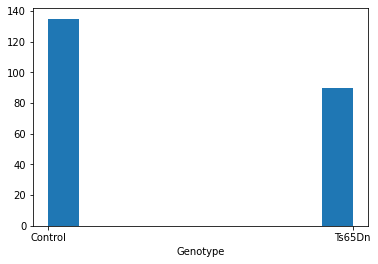

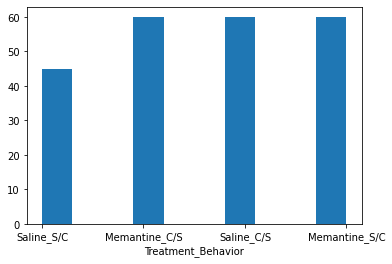

In [ ]:
#checking about balanced class or not
for col in test_df.columns.values:
 
   if (test_df[col].dtypes == 'object'):            # plot of histogran 
     plt.hist(test_df[col])                         # change the value of object to float64 it will display training sample graph
     plt.xlabel(col)                                 
     plt.show()

In [ ]:
# collection of numeric type features into num_df_test dataframe
num_df_test = test_df.select_dtypes(include=['int64','float64']).copy()

In [ ]:
#Now we are droping the columns which are in the list 'to_drop' from the dataframe
test_copy1 = num_df_test.drop(to_drop, axis=1)
print(test_copy1.shape)

(225, 55)


In [ ]:
# multivariant impute for missing data


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
num_df1 = (imp.fit_transform(test_copy1))                         # multivariant impute for missing data
num_df1 = pd.DataFrame(num_df1)
IterativeImputer(random_state=0)


IterativeImputer(random_state=0)

In [ ]:
#model testing
X_test= num_df1;

#normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

y_c_test = test_df.iloc[:,-2]
y_m_test = test_df.iloc[:,-1]

y_c_test = y_c_test.replace({'Ts65Dn': -1, 'Control': 1 })
y_m_test = y_m_test.replace({'Memantine_C/S': 1, 'Memantine_S/C': 2 ,'Saline_C/S': 3, 'Saline_S/C': 4})

X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.032683,-0.168294,1.057124,0.626060,-0.431684,0.792963,-0.250462,0.503498,-0.377131,0.025915,...,0.137523,-0.621301,-0.821853,-0.499694,-0.836383,-0.735079,0.841781,-0.965198,0.146661,0.013173
1,1.090727,-1.220161,-1.430086,-0.717993,-1.333437,-0.353495,-0.228413,-0.783757,-1.352459,-0.996847,...,-1.154914,-1.346985,0.897906,0.531005,0.632534,0.885769,-1.405650,-0.306108,0.653502,-0.583058
2,-0.951975,-1.051357,-1.943105,-0.836476,-0.840260,-1.166090,-1.677882,-1.155469,-1.509097,-1.432721,...,-0.202732,0.181915,1.843535,0.846409,0.517575,-0.196076,-0.574230,1.783336,1.157090,-0.245323
3,0.372284,-0.580972,-1.892183,-0.972764,-1.619338,-1.334765,-0.545987,-1.155090,-1.749113,-1.267201,...,-1.517763,-1.524993,0.100933,0.337119,0.393612,-0.120804,-1.404997,-0.413953,-0.040433,-0.765704
4,0.887416,1.923244,1.501161,0.022067,-0.757459,0.423275,1.159789,0.797563,0.913023,0.729819,...,-0.335557,0.061378,-0.447700,-0.283005,0.610229,-0.464649,1.326581,-0.520679,-0.781969,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.297943,-1.446679,-1.432852,-0.860858,0.642256,-1.651391,-1.076768,-0.452893,-1.252205,0.058413,...,-0.000963,-0.839920,-0.104991,-0.044604,-0.474220,0.807452,-1.206462,-0.236657,-0.251339,-1.639618
221,-0.796183,-0.948048,-0.937444,-2.035303,-0.673038,-1.955080,-1.502324,-1.930532,-0.064280,-0.603537,...,-1.267600,-0.564318,-0.444943,-0.323048,-0.641670,0.001278,-1.203449,-1.154105,-1.148702,0.667068
222,0.233408,1.441601,0.435789,1.846611,1.379113,0.997581,1.299870,1.883180,2.233286,1.197759,...,-1.060959,-1.826909,-0.222888,0.006007,-0.438111,-0.727472,-0.928836,0.635388,-1.547698,-0.226782
223,2.468156,-0.103446,0.146889,-0.898625,-0.627109,-0.545030,1.140809,-1.434847,-0.404838,-1.556155,...,-1.530174,1.847849,-0.439096,-1.049310,-1.065158,-0.454345,-1.431349,-0.569632,-0.803977,0.849189


Binary Classification

In [ ]:
#X_rfe.columns[selected_features_bi]
X_test_rfe_binary = X_test[X_test.columns[selected_features_bi]]
X_test_rfe_binary


,0,2,3,4,5,6,7,8,10,11,...,44,45,46,48,49,50,51,52,53,54
0,-1.032683,1.057124,0.626060,-0.431684,0.792963,-0.250462,0.503498,-0.377131,-0.573475,0.377985,...,-0.188472,0.137523,-0.621301,-0.499694,-0.836383,-0.735079,0.841781,-0.965198,0.146661,0.013173
1,1.090727,-1.430086,-0.717993,-1.333437,-0.353495,-0.228413,-0.783757,-1.352459,-1.270577,-1.087158,...,0.069136,-1.154914,-1.346985,0.531005,0.632534,0.885769,-1.405650,-0.306108,0.653502,-0.583058
2,-0.951975,-1.943105,-0.836476,-0.840260,-1.166090,-1.677882,-1.155469,-1.509097,-0.979230,-0.216455,...,-0.311623,-0.202732,0.181915,0.846409,0.517575,-0.196076,-0.574230,1.783336,1.157090,-0.245323
3,0.372284,-1.892183,-0.972764,-1.619338,-1.334765,-0.545987,-1.155090,-1.749113,-1.588082,-1.422909,...,-0.470261,-1.517763,-1.524993,0.337119,0.393612,-0.120804,-1.404997,-0.413953,-0.040433,-0.765704
4,0.887416,1.501161,0.022067,-0.757459,0.423275,1.159789,0.797563,0.913023,0.732773,-0.687654,...,0.227088,-0.335557,0.061378,-0.283005,0.610229,-0.464649,1.326581,-0.520679,-0.781969,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.297943,-1.432852,-0.860858,0.642256,-1.651391,-1.076768,-0.452893,-1.252205,-1.102489,-0.236092,...,0.721782,-0.000963,-0.839920,-0.044604,-0.474220,0.807452,-1.206462,-0.236657,-0.251339,-1.639618
221,-0.796183,-0.937444,-2.035303,-0.673038,-1.955080,-1.502324,-1.930532,-0.064280,1.341783,-1.624824,...,-0.641437,-1.267600,-0.564318,-0.323048,-0.641670,0.001278,-1.203449,-1.154105,-1.148702,0.667068
222,0.233408,0.435789,1.846611,1.379113,0.997581,1.299870,1.883180,2.233286,3.113173,2.633857,...,-1.074473,-1.060959,-1.826909,0.006007,-0.438111,-0.727472,-0.928836,0.635388,-1.547698,-0.226782
223,2.468156,0.146889,-0.898625,-0.627109,-0.545030,1.140809,-1.434847,-0.404838,-0.259476,0.334999,...,-1.389812,-1.530174,1.847849,-1.049310,-1.065158,-0.454345,-1.431349,-0.569632,-0.803977,0.849189


In [ ]:
best_bi=svm.SVC(kernel="rbf",C=1,random_state=0).fit(X_new_rfe_binary,y_c)
#best_bi=MLPClassifier(max_iter=5000,hidden_layer_sizes=40,learning_rate_init=0.005).fit(X,y_c)

In [ ]:
y_pred_bi=best_bi.predict(X_test_rfe_binary)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_c_test,y_pred_bi))

print(sklearn.metrics.classification_report(y_c_test,y_pred_bi))

Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

          -1       0.77      0.77      0.77        90
           1       0.84      0.84      0.84       135

    accuracy                           0.81       225
   macro avg       0.81      0.81      0.81       225
weighted avg       0.81      0.81      0.81       225



Multiclass Classification

In [ ]:
X_rfe_m.columns[selected_features_multi]
X_test_rfe_multi = X_test[X_rfe_m.columns[selected_features_multi]]
X_test_rfe_multi

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.032683,-0.168294,1.057124,0.626060,-0.431684,0.792963,-0.250462,0.503498,-0.377131,0.025915,...,0.137523,-0.621301,-0.821853,-0.499694,-0.836383,-0.735079,0.841781,-0.965198,0.146661,0.013173
1,1.090727,-1.220161,-1.430086,-0.717993,-1.333437,-0.353495,-0.228413,-0.783757,-1.352459,-0.996847,...,-1.154914,-1.346985,0.897906,0.531005,0.632534,0.885769,-1.405650,-0.306108,0.653502,-0.583058
2,-0.951975,-1.051357,-1.943105,-0.836476,-0.840260,-1.166090,-1.677882,-1.155469,-1.509097,-1.432721,...,-0.202732,0.181915,1.843535,0.846409,0.517575,-0.196076,-0.574230,1.783336,1.157090,-0.245323
3,0.372284,-0.580972,-1.892183,-0.972764,-1.619338,-1.334765,-0.545987,-1.155090,-1.749113,-1.267201,...,-1.517763,-1.524993,0.100933,0.337119,0.393612,-0.120804,-1.404997,-0.413953,-0.040433,-0.765704
4,0.887416,1.923244,1.501161,0.022067,-0.757459,0.423275,1.159789,0.797563,0.913023,0.729819,...,-0.335557,0.061378,-0.447700,-0.283005,0.610229,-0.464649,1.326581,-0.520679,-0.781969,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.297943,-1.446679,-1.432852,-0.860858,0.642256,-1.651391,-1.076768,-0.452893,-1.252205,0.058413,...,-0.000963,-0.839920,-0.104991,-0.044604,-0.474220,0.807452,-1.206462,-0.236657,-0.251339,-1.639618
221,-0.796183,-0.948048,-0.937444,-2.035303,-0.673038,-1.955080,-1.502324,-1.930532,-0.064280,-0.603537,...,-1.267600,-0.564318,-0.444943,-0.323048,-0.641670,0.001278,-1.203449,-1.154105,-1.148702,0.667068
222,0.233408,1.441601,0.435789,1.846611,1.379113,0.997581,1.299870,1.883180,2.233286,1.197759,...,-1.060959,-1.826909,-0.222888,0.006007,-0.438111,-0.727472,-0.928836,0.635388,-1.547698,-0.226782
223,2.468156,-0.103446,0.146889,-0.898625,-0.627109,-0.545030,1.140809,-1.434847,-0.404838,-1.556155,...,-1.530174,1.847849,-0.439096,-1.049310,-1.065158,-0.454345,-1.431349,-0.569632,-0.803977,0.849189


In [ ]:
best_multi=svm.SVC(kernel="rbf",C=1,random_state=0).fit(X_rfe_multi,y_m)
#best_bi=RandomForestClassifier(n_estimators=10,max_depth=20).fit(X,y_c)

In [ ]:
y_pred_multi=best_multi.predict(X_test_rfe_multi)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_m_test,y_pred_multi))

print(sklearn.metrics.classification_report(y_m_test,y_pred_multi))

Accuracy: 0.8577777777777778
              precision    recall  f1-score   support

           1       0.83      0.88      0.85        60
           2       0.83      0.97      0.89        60
           3       0.86      0.82      0.84        60
           4       0.97      0.73      0.84        45

    accuracy                           0.86       225
   macro avg       0.87      0.85      0.86       225
weighted avg       0.87      0.86      0.86       225



**Part 9: Write your observations and thoughts**


In [ ]:
''' Here we have 2 classification problem, one is binary classification and other is four class calssifiaction.

We drope columns with greater than 0.8 correlation coeffiecent.
We use multivariet fearture imputation for encounter missing datas.
we didnt drop any missing valued column

From given 4 clssification model, Support Vector Machines and Neural Network Model works quite well for both binary and multiclass classifiaction.

Talking about feature Importnace: for binary classification for every model "APP_N" protine is major Important feature.
For multiclass calssifiaction for every model feture importance is different for all four moddels.'''




' Here we have 2 classification problem, one is binary classification and other is four class calssifiaction.\n\nWe drope columns with greater than 0.8 correlation coeffiecent.\nWe use multivariet fearture imputation for encounter missing datas.\nwe didnt drop any missing valued column\n\nFrom given 4 clssification model, Support Vector Machines and Neural Network Model works quite well for both binary and multiclass classifiaction.\n\nTalking about feature Importnace: for binary classification for every model "APP_N" protine is major Important feature.\nFor multiclass calssifiaction for every model feture importance is different for all four moddels.'